# Histogram Processing

For an $L=2^b$ level image, pixels take on intensity values $r_k=0,\ldots,L-1$. $b$ denotes the number of bits uses to represent the pixel intensities.

Let $f(x,y)$ denote an $M\times N$ image with a total of $MN$ pixel intensity values, we determine the number of pixels with take on each intensity value.

$n_k$ is the number of pixels with value $r_k$ and forms an un-normalized histogram. The normalised histogram is defined as
\begin{equation}
p(r_k)= \frac{n_k}{MN}
\end{equation}

## Example

Consider the $4\times 4$ image below

$
f(x,y) = \begin{bmatrix}
0 & 1 & 2&3 \\
4 & 5 & 6& 7 \\
8&9&10 &11 \\
12 &13 & 14&15 \\
\end{bmatrix}
$

We show its histogram below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
I = np.arange(16).reshape((4,4))

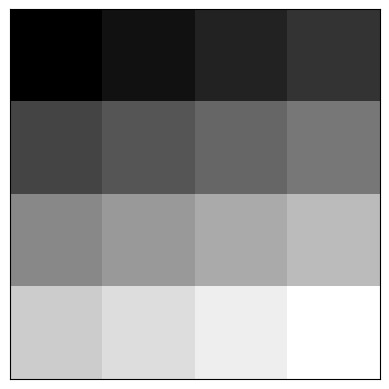

In [3]:
plt.imshow(I, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

Text(0, 0.5, 'Count')

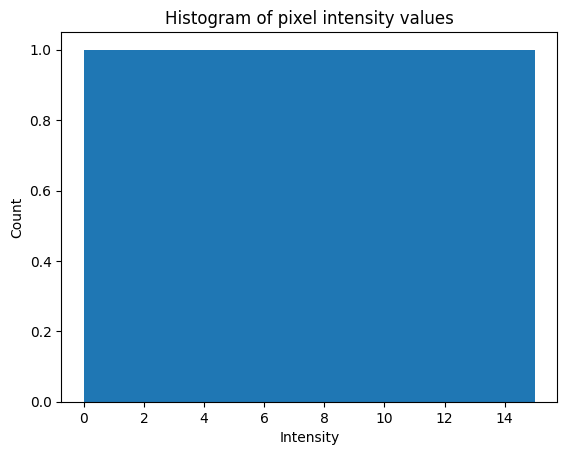

In [4]:
# unnormalized
plt.hist(I.flatten(), 16);
plt.title('Histogram of pixel intensity values')
plt.xlabel('Intensity')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

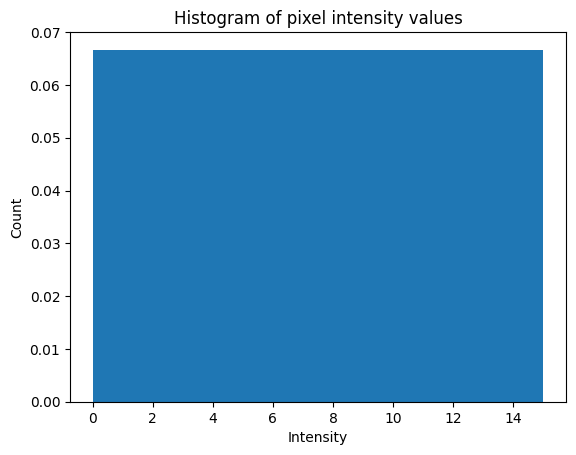

In [5]:
# normalised
plt.hist(I.flatten(), 16, density=True);
plt.title('Histogram of pixel intensity values')
plt.xlabel('Intensity')
plt.ylabel('Count')

## Histograms and Contrast
Histograms of images are related to their appearance. If the histogram is concentrated in high values this is a light image. On the other hand dark images have histograms concetrated at low values. If the values are evenly spread, this is a high contrast image.

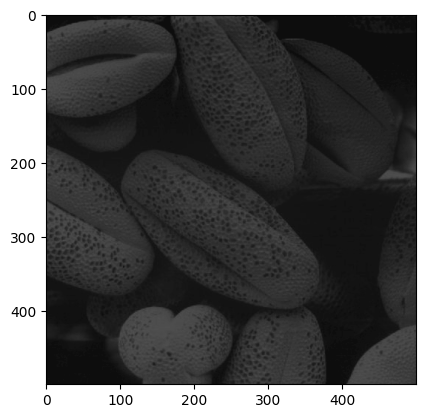

In [6]:
image = img.imread("img/dark.tif")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

(-5.0, 260.0)

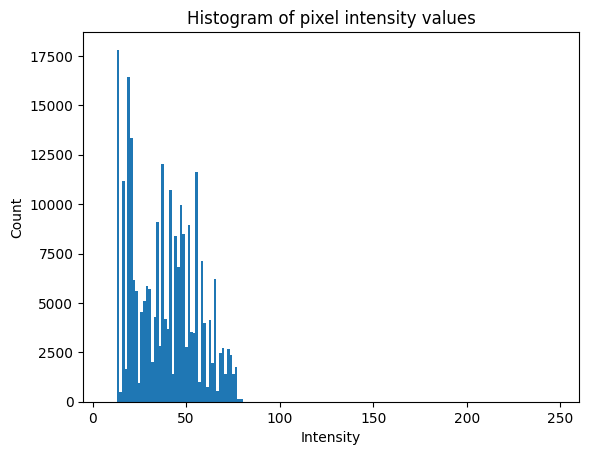

In [7]:
plt.hist(image.flatten(), 50);
plt.title('Histogram of pixel intensity values')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.xlim([-5, 260])

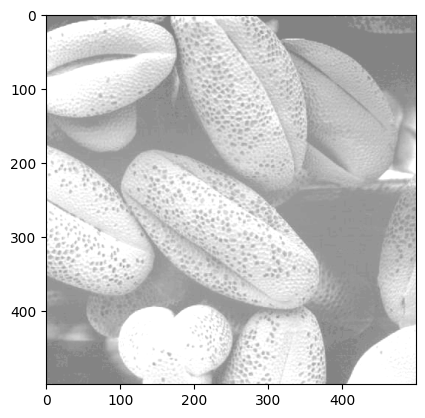

In [8]:
image = img.imread("img/light.tif")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

(-5.0, 260.0)

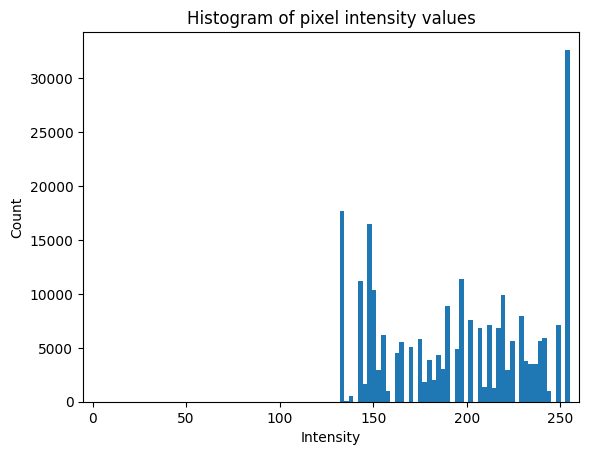

In [9]:
plt.hist(image.flatten(), 50);
plt.title('Histogram of pixel intensity values')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.xlim([-5, 260])

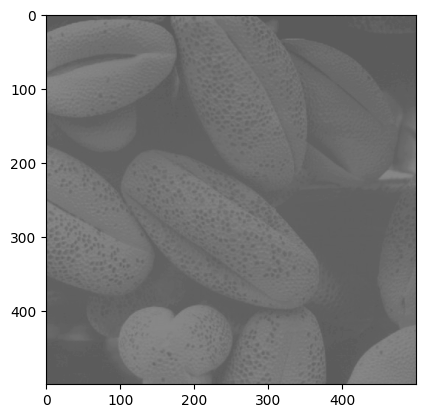

In [10]:
image = img.imread("img/low-contrast.tif")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

(-5.0, 260.0)

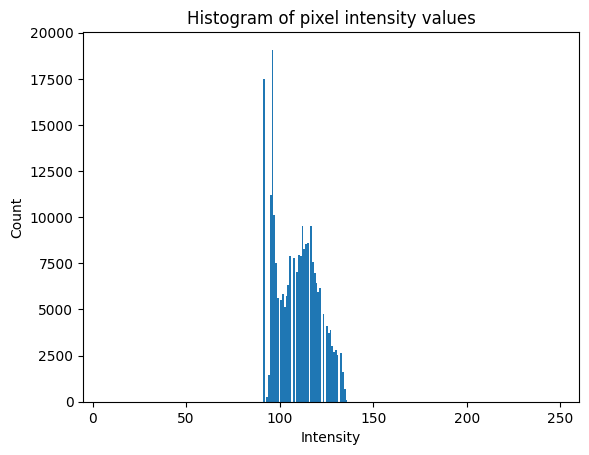

In [11]:
plt.hist(image.flatten(), 50);
plt.title('Histogram of pixel intensity values')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.xlim([-5, 260])

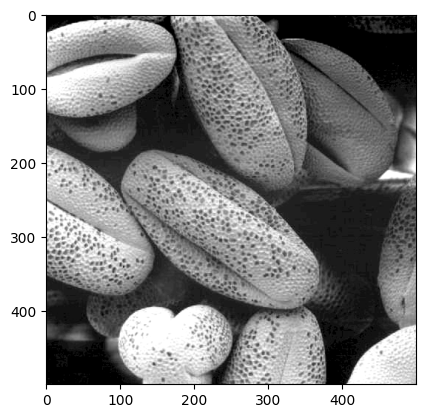

In [12]:
image = img.imread("img/high-contrast.tif")
plt.imshow(image, cmap='gray',  vmin=0, vmax=255)
plt.show()

(-5.0, 260.0)

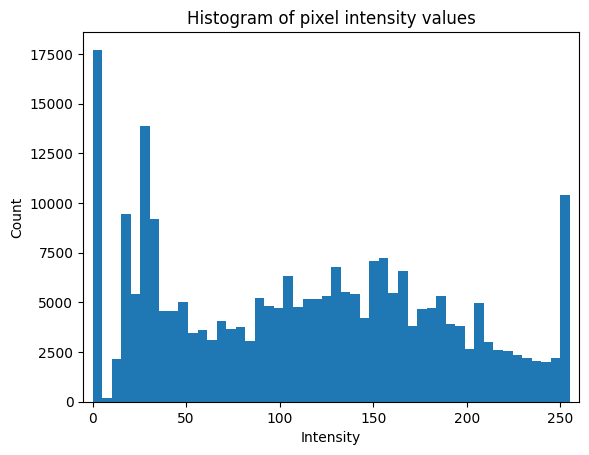

In [13]:
plt.hist(image.flatten(), 50);
plt.title('Histogram of pixel intensity values')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.xlim([-5, 260])

##  Histogram Equalisation
It is often desirable to obtain high contrast images which show a high level of gray-level detail. These are images with a high dynamic range and whose histograms occupy the entire range of intensity values available. Ideally this would be a histogram that is uniformly distributed.

Histograms can be viewed as probability distributions and there is a well developed theory on the transformation of random variables.

### Transformation of Random Variables
Consider a random variable $X$ with a probability density function $f_X(x)$. If we form a new random variable $Y=r(X)$ where $r$ is a strictly monotonic function with an inverse $s = r^{-1}$, then we have

\begin{equation}
f_Y(y)=f_X(s(y))\Big|\frac{ds(y)}{dy}\Big|
\end{equation}

#### Example
Let $r(x)=\log\frac{1}{1-x}$ for $0\leq x\leq 1$.

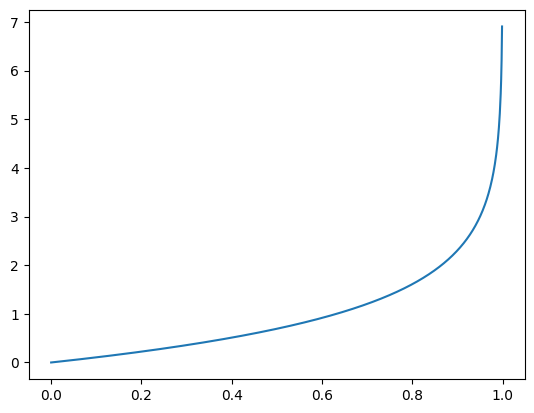

In [14]:
x = np.linspace(0, 1, 1000, endpoint=False)

plt.plot(x, np.log(1 / (1 - x)))

We can show that the inverse function is 

\begin{equation}
s(y) = 1 - e^{-y}
\end{equation}

Also if we start with $X$ as a uniformly distributed random variable and tranform it using $r(x)=\log\frac{1}{1-x}$, we obtain an exponentially distributed function.

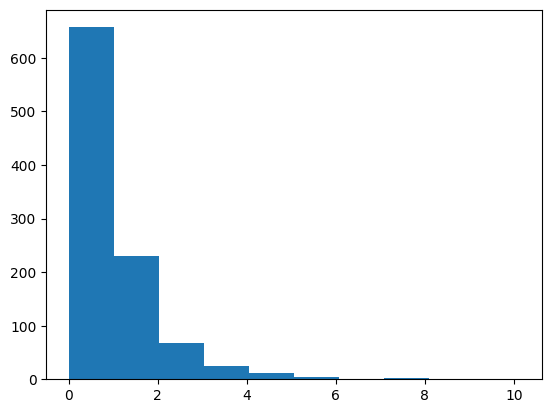

In [15]:
x = np.random.rand(1000)
y = np.log(1 / (1 - x))

plt.hist(y);

We can tranform a random variable into a uniformly distributed one by selecting the cummulative distribution function as the transformation.

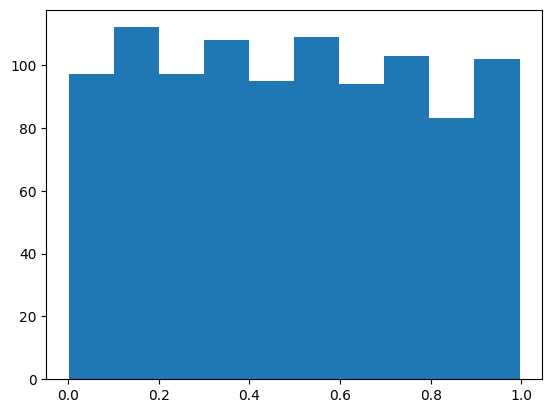

In [16]:
x = np.random.exponential(scale=1.0, size=1000)
y = 1 - np.exp(- x)

plt.hist(y);

## Transforming pixel distributions
Consider two pixel distributions $p_r(r)$ and $p_s(s)$ where 

\begin{equation}
s=T(r)
\end{equation}

We assume for now that the $s$ and $r$ are continuous. If $T(r)$ is a strictly monotonic function, we have

\begin{equation}
p_s(s) = p_r(r)\Big|\frac{dr}{ds}\Big|
\end{equation}

We chose $T(.)$ to ensure $p_s(s)$ is the uniform distribution. We set

\begin{equation}
s=T(r)=(L-1)\int_0^rp_r(w)dw
\end{equation}
we have
\begin{equation}
\frac{ds}{dr}=(L-1)\frac{d}{dr}\int_0^rp_r(w)dw
\end{equation}
Which if we apply Leibniz's rule yields

\begin{equation}
\frac{ds}{dr}=(L-1)p_r(r)
\end{equation}


Returning to the discrete version we encounter in images we have

\begin{equation}
p_r(r_k)=\frac{n_k}{MN}
\end{equation}

We transfrom the pixels using

\begin{equation}
s_k=T(r_k)=(L-1)\sum_{j=0}^kp_r(r_k)
\end{equation}

#### Example

Apply histogram equalization to the $4\times 4$ image below

$
f(x,y) = \begin{bmatrix}
0 & 0 & 0&0 \\
0 & 0 & 1& 1 \\
1&1&2 &2 \\
3 &4 & 5&6 \\
\end{bmatrix}
$


### Histogram Matching
Sometimes we would like to transform a pixel intensity distribution to a predefined distribution. This is histogram matching. It also draws on the theory of transformation of random variables. We can generate any distribution from samples of a uniform distribution if we select the transformation function appropriately. In particular we select

\begin{equation}
r(x) = F_Y^{-1}(x)
\end{equation}

where $F_Y(y)$ is the cumulative distribution function of the desired distribution. 

#### Example
To transform uniform variable to the exponential we proceed as follows.

The desired distribution is $f_Y(y)=e^{-y}$. We have $F_Y(y)=?$ also $F_Y^{-1}()=?$ 


#### Implementation
For images we proceed as follows:
1. Obtain $p_r(r)$
2. From $p(z)$ the desired distribution obtain 

\begin{equation}
G(z) = (L-1)\int_0^zp_z(\upsilon)d\upsilon
\end{equation}

3. Compute $z=G^{-1}(s)$ where $s$ are normalised pixels of the original image
